In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
pd.set_option("display.max_columns", None) # unlimited columns

In [93]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original = pd.read_csv("original.csv")

In [94]:
train['Dataset'] = "train"
test['Dataset'] = "test"
original['Dataset'] = "original"

original.rename(columns={"Gender": "Sex"}, inplace=True) # rename Gender to Sex
original.rename(columns={"User_ID": "id"}, inplace=True) # rename User_ID to id

In [95]:
submission.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [96]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train


In [97]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Dataset
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,test
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,test
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,test
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,test
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,test


In [98]:
original.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,original
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,original
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,original
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,original
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,original


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
 9   Dataset     750000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 57.2+ MB


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
 8   Dataset     250000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 17.2+ MB


In [101]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15000 non-null  int64  
 1   Sex         15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
 9   Dataset     15000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


In [102]:
to_df = pd.concat([train, original])
df = pd.concat([train, test, original])
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,original
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,original
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,original
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,original


Leave no stone unturned

**Check categorical distribution**

<Axes: xlabel='Sex', ylabel='count'>

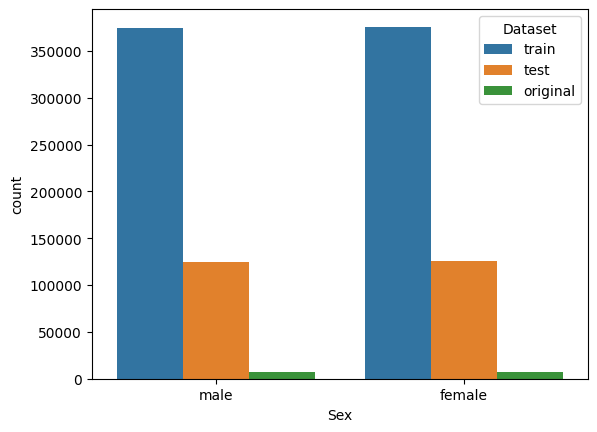

In [103]:
sns.countplot(df, x="Sex", hue="Dataset")

Same sex distribution for every dataset. **Check numerical distribution**. No nans in the dataset.

<Axes: xlabel='Age'>

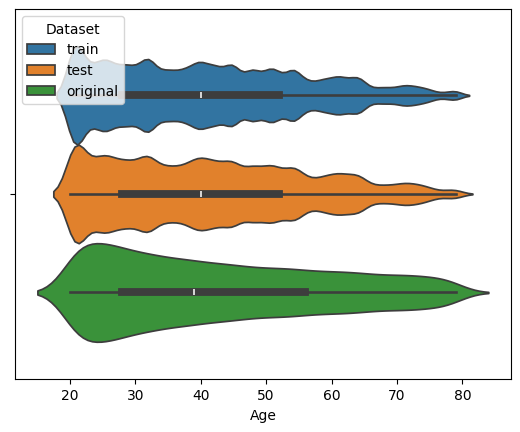

In [104]:
sns.violinplot(df, x="Age", hue="Dataset")

<Axes: xlabel='Age', ylabel='count'>

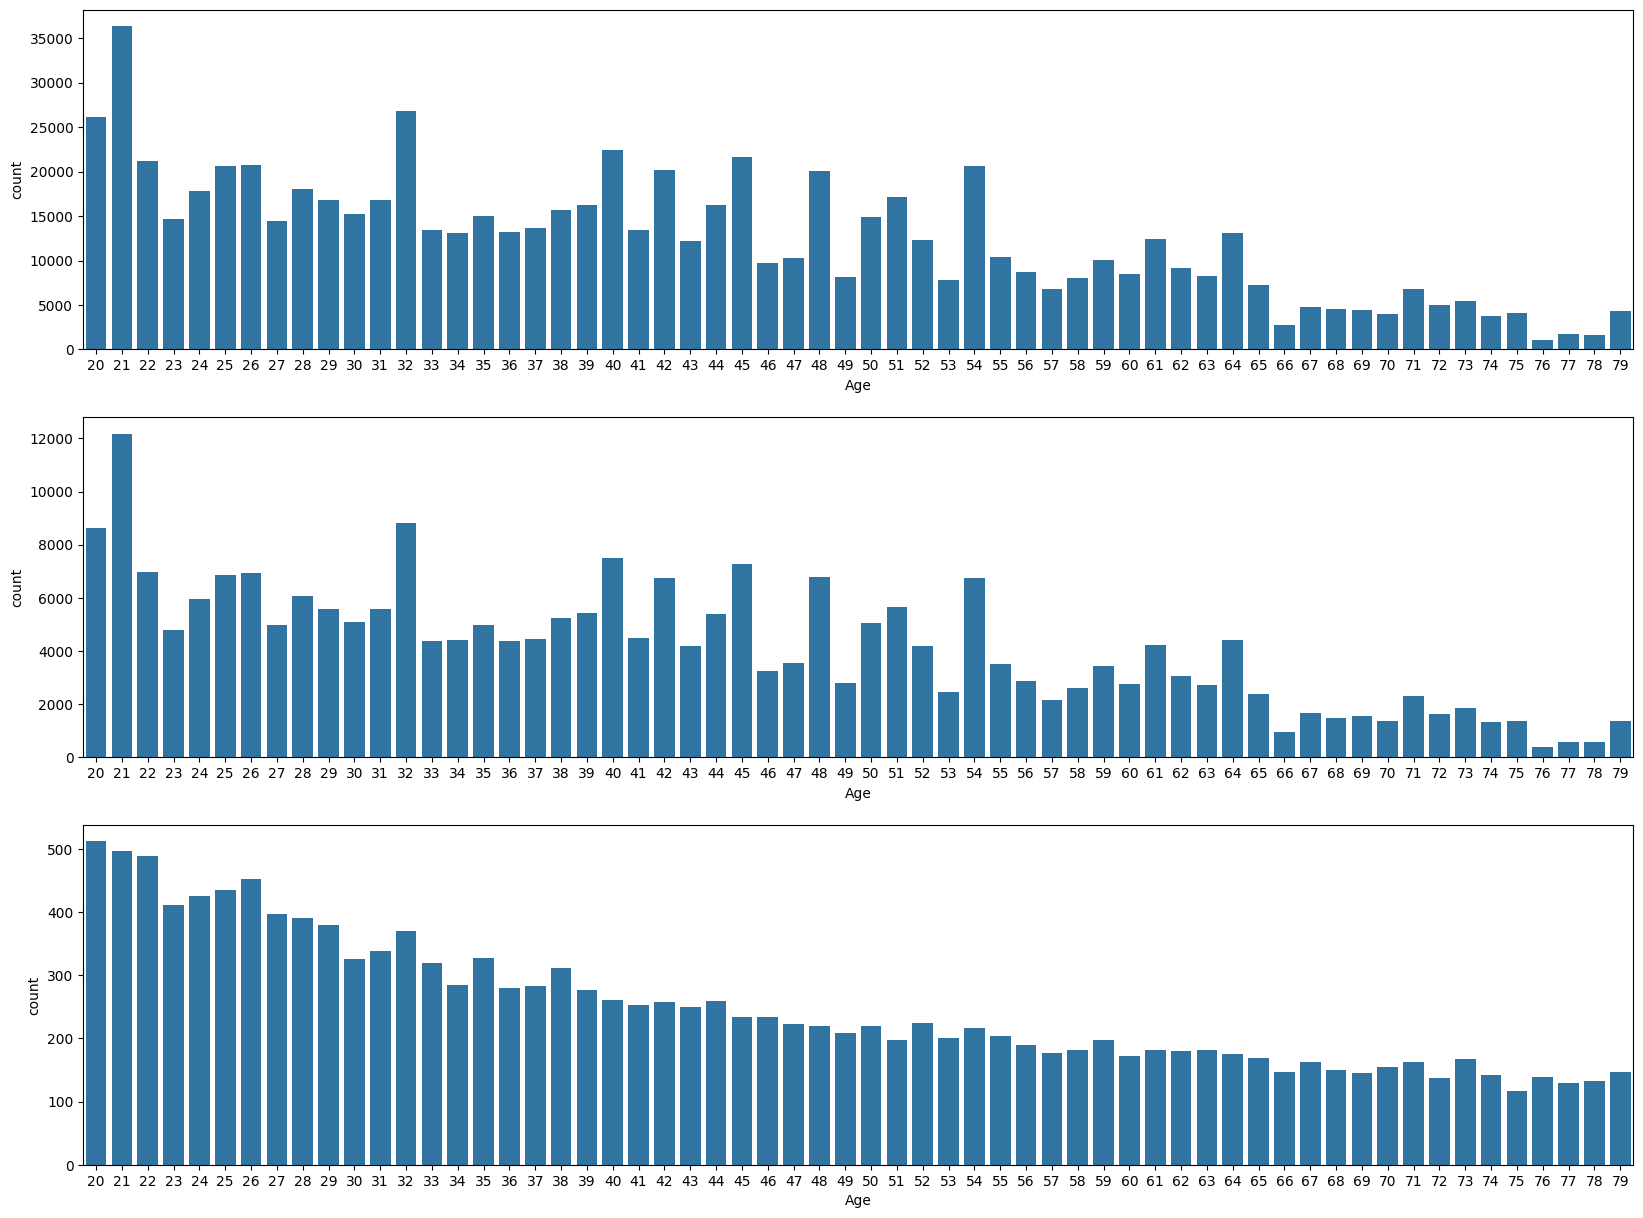

In [105]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

sns.countplot(train, x="Age",ax=axes[0])
sns.countplot(test, x="Age",ax=axes[1])
sns.countplot(original, x="Age",ax=axes[2])

Original distribution for Age seems more uniform than both train and test. train and test look very similar so most likely sampled from the same distribution. Age also doesn't have gaps in all 3 datasets. 

**Check Height**

<Axes: xlabel='Height'>

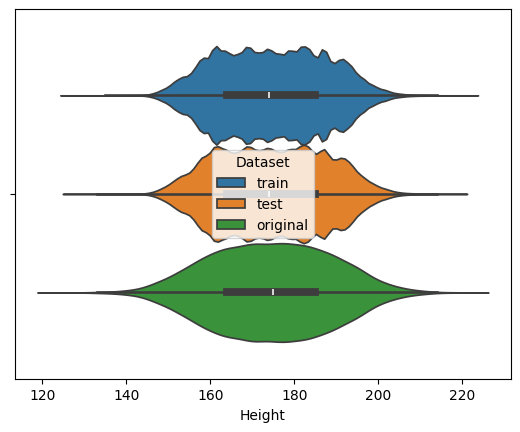

In [106]:
sns.violinplot(df, x="Height", hue="Dataset")

<Axes: xlabel='Height', ylabel='count'>

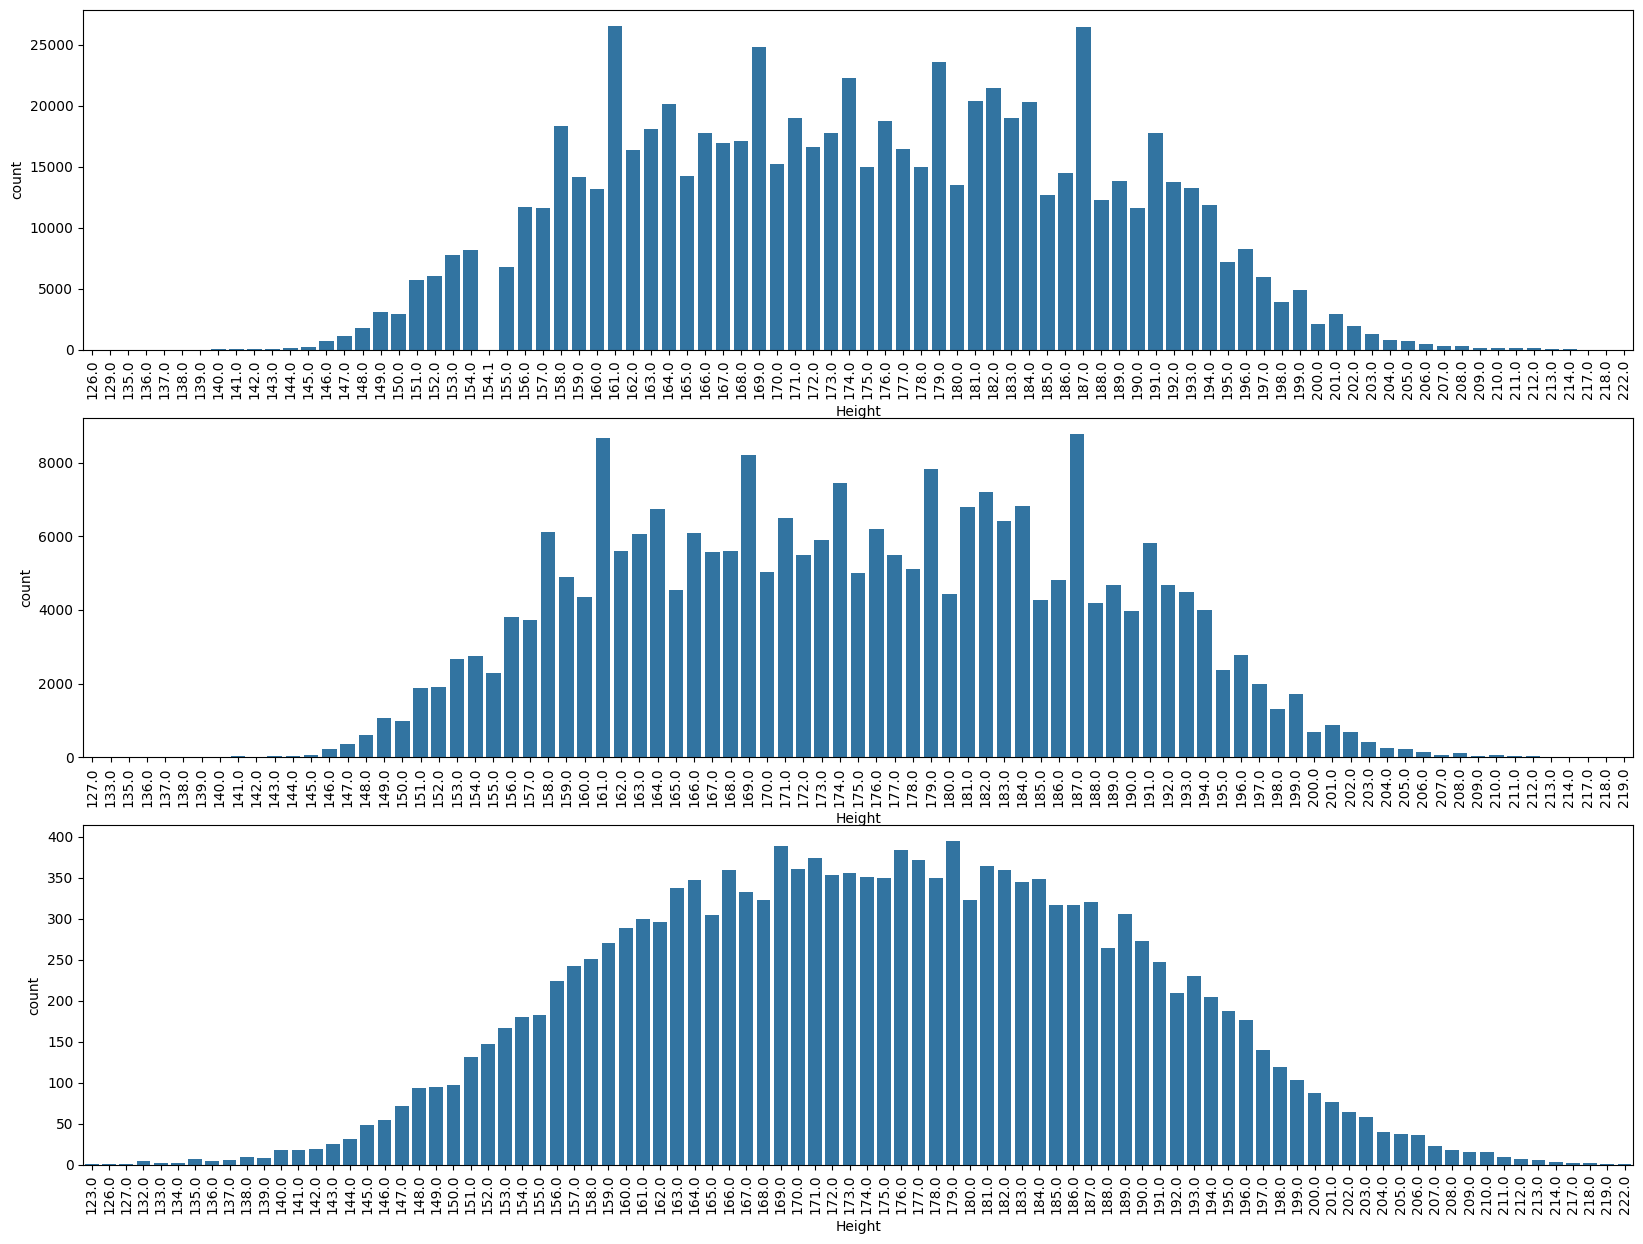

In [107]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Height",ax=axes[0])
sns.countplot(test, x="Height",ax=axes[1])
sns.countplot(original, x="Height",ax=axes[2])

In [108]:
train[train["Height"]==154.1] # odd female with 154.1 height

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
146439,146439,female,53,154.1,58.0,28.0,111.0,41.2,203.0,train


Normal distribution for Height. Similar situation just like Age. However, there is one female with Height that is a floating point at 154.1. Most likely this is in centimeters.

**Check Weight**

<Axes: xlabel='Weight'>

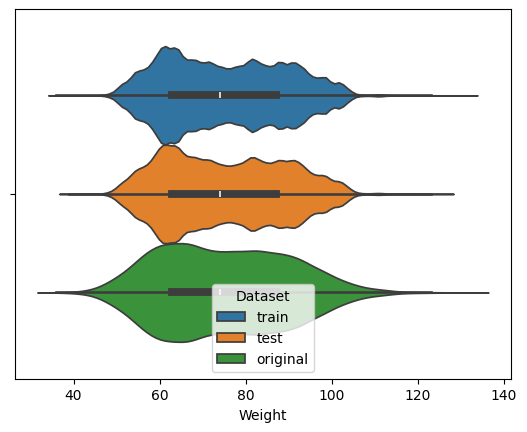

In [109]:
sns.violinplot(df, x="Weight", hue="Dataset")

<Axes: xlabel='Weight', ylabel='count'>

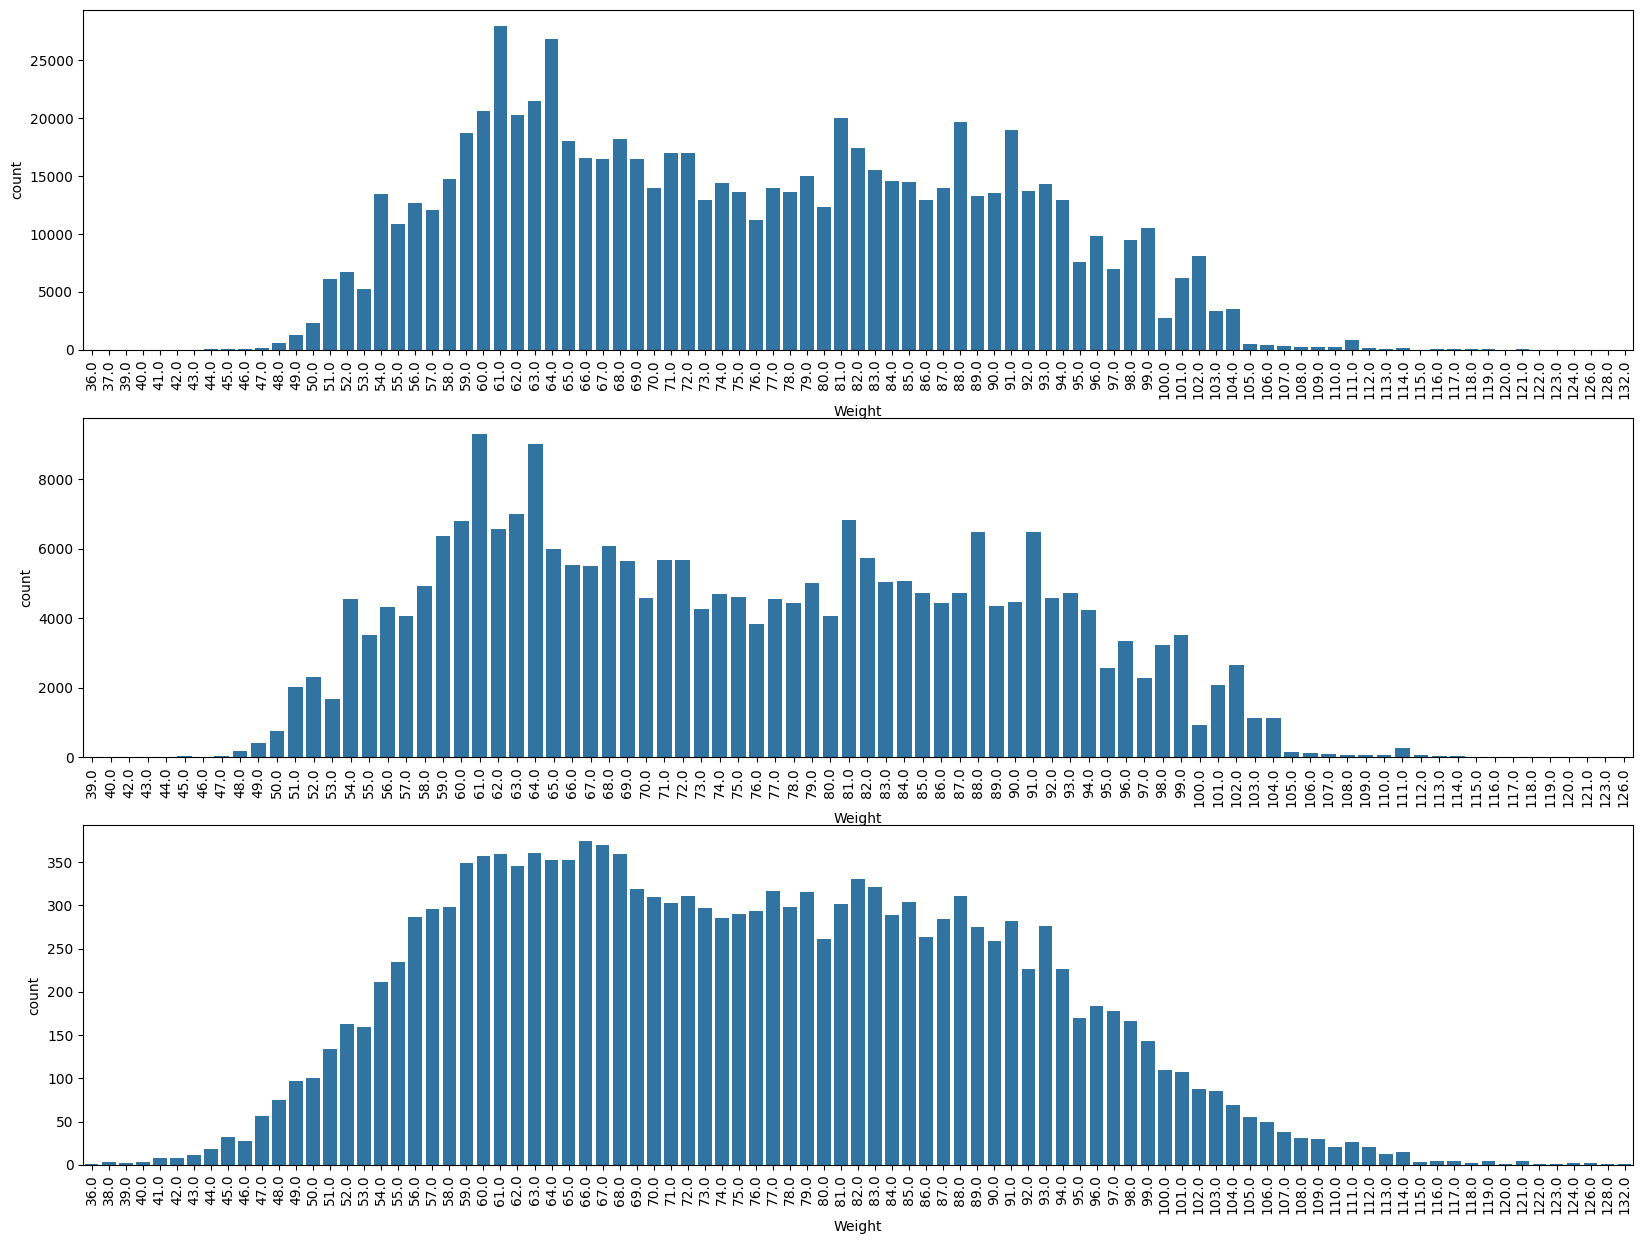

In [110]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Weight",ax=axes[0])
sns.countplot(test, x="Weight",ax=axes[1])
sns.countplot(original, x="Weight",ax=axes[2])

Average weight for people in U.S is around 170 - 190 pounds. Since mean here is around 75, we can probably assume that this is in pounds. Interestingly, there are 2 spikes here as well. Not sure why this is the case. 

**Check Duration**

<Axes: xlabel='Duration'>

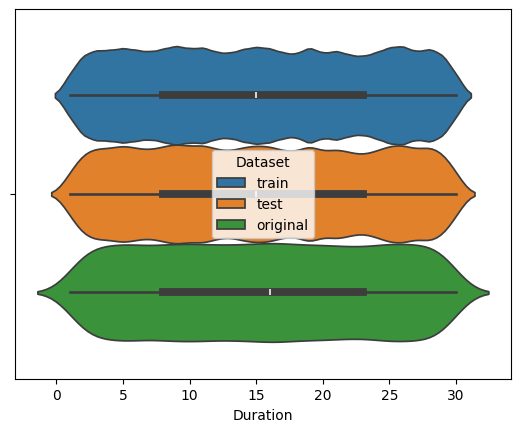

In [111]:
sns.violinplot(df, x="Duration", hue="Dataset")

<Axes: xlabel='Duration', ylabel='count'>

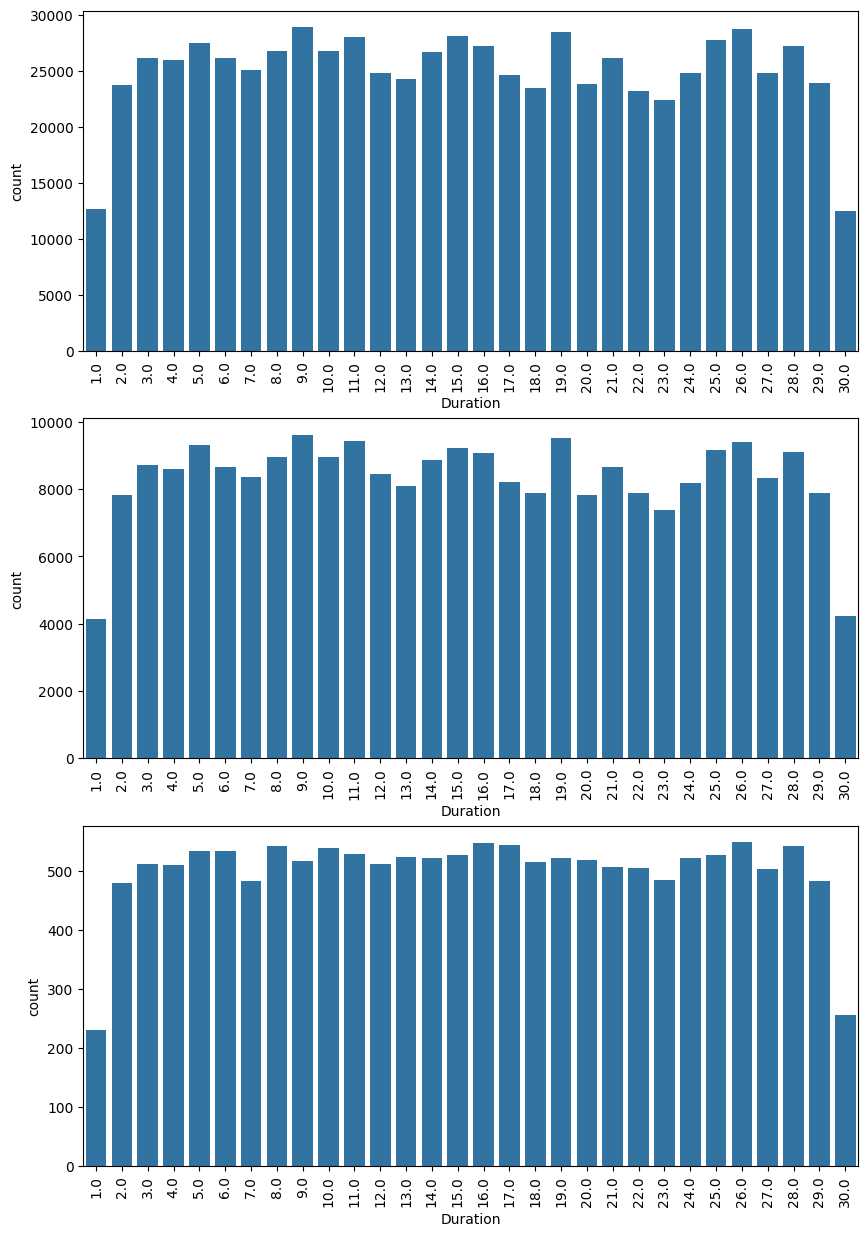

In [112]:
fig, axes = plt.subplots(3,1,figsize=(10,15))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Duration",ax=axes[0])
sns.countplot(test, x="Duration",ax=axes[1])
sns.countplot(original, x="Duration",ax=axes[2])

The tails for duration are rare. Looks very uniform. Most likely in minutes when compared to Calories .

**Check Heart Rate**

<Axes: xlabel='Heart_Rate'>

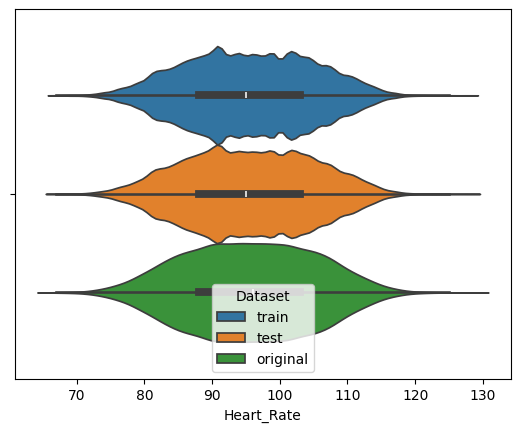

In [113]:
sns.violinplot(df, x="Heart_Rate", hue="Dataset")

<Axes: xlabel='Heart_Rate', ylabel='count'>

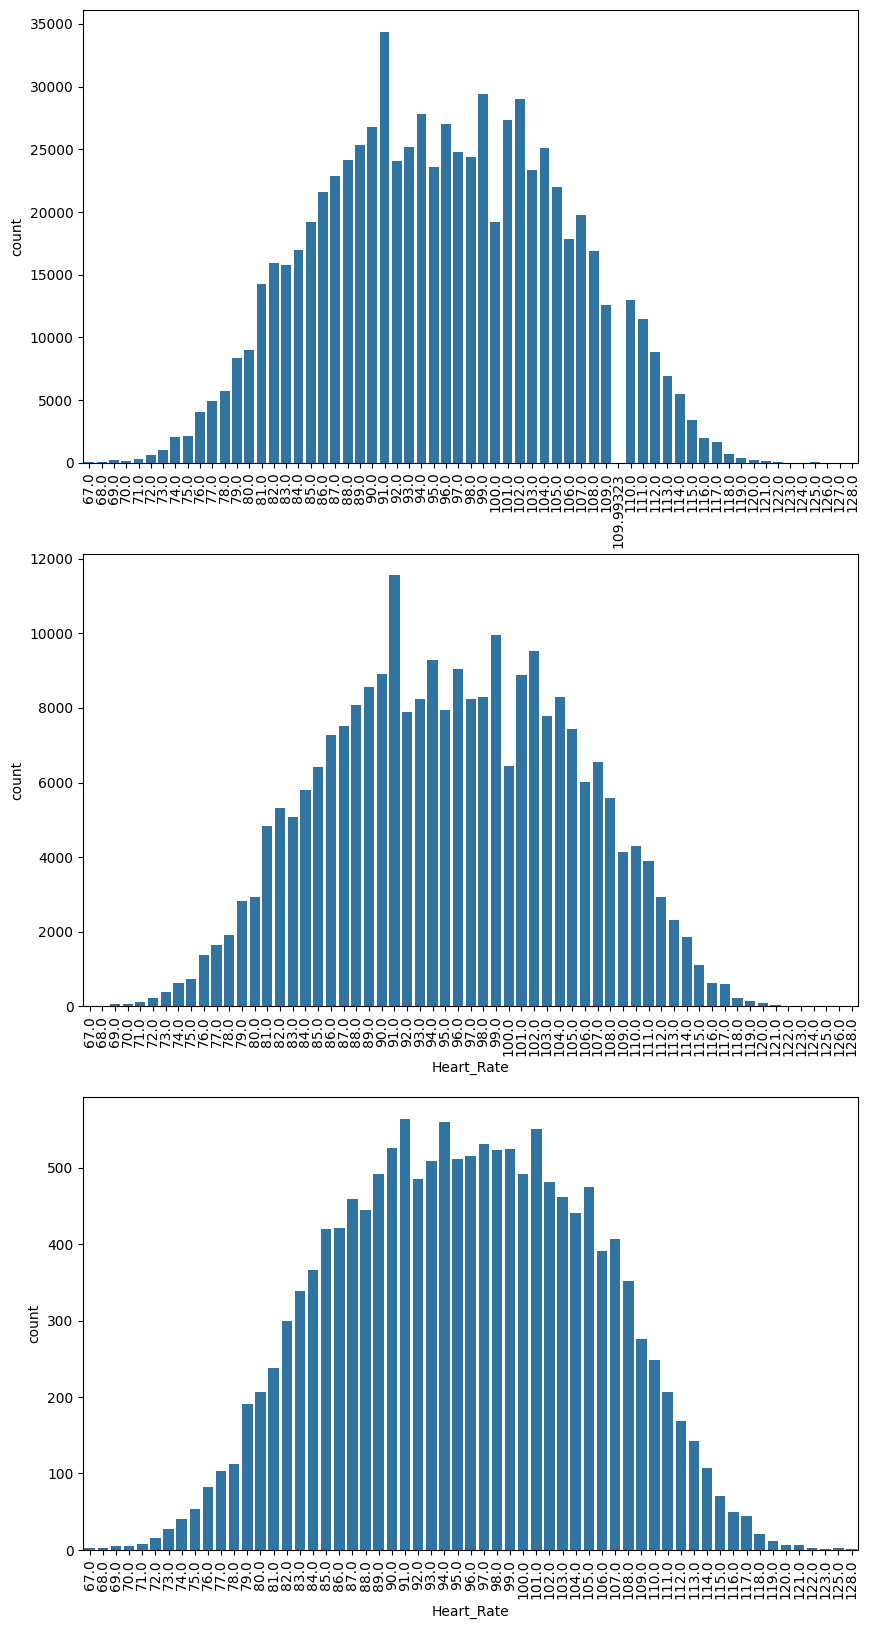

In [114]:
fig, axes = plt.subplots(3,1,figsize=(10,20))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.countplot(train, x="Heart_Rate",ax=axes[0])
sns.countplot(test, x="Heart_Rate",ax=axes[1])
sns.countplot(original, x="Heart_Rate",ax=axes[2])

In [115]:
train[train["Heart_Rate"]==109.99323] # odd female with odd heart rate

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
156040,156040,female,21,162.0,61.0,27.0,109.99323,40.9,169.0,train


~109.99 Heart Rate. Similar to the female with odd Height. However, these are different people. 

<Axes: xlabel='Body_Temp'>

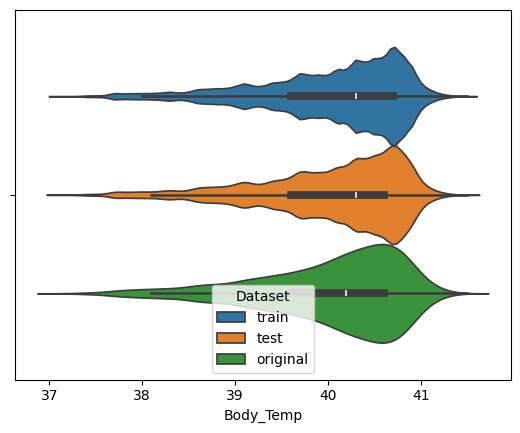

In [116]:
sns.violinplot(df, x="Body_Temp", hue="Dataset")

<Axes: xlabel='Body_Temp', ylabel='Count'>

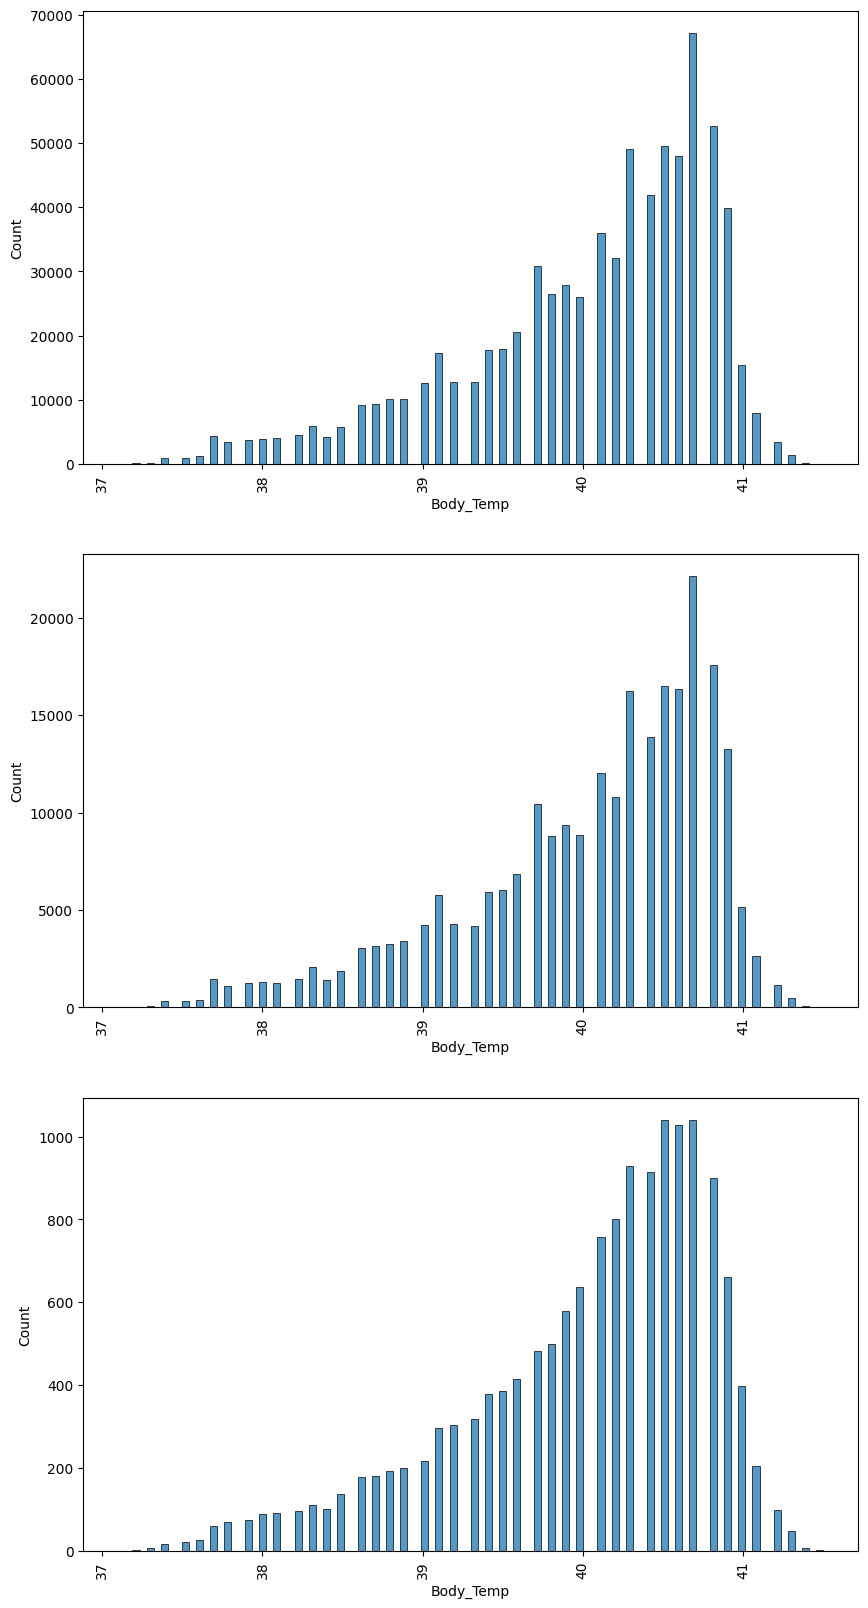

In [131]:
fig, axes = plt.subplots(3,1,figsize=(10,20))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)

sns.histplot(train, x="Body_Temp",ax=axes[0], bins=100)
sns.histplot(test, x="Body_Temp",ax=axes[1], bins=100)
sns.histplot(original, x="Body_Temp",ax=axes[2], bins=100)

In [118]:
train["Body_Temp"].unique().shape[0]

75

Body temperature is most likely in celsius. Also negatively skewed. However, this is even more confusing. Many values have really precise digits for temperature. There are only 75 unique temps for training set. Given there are many points for training and original, this indicates that it was sampled to closest weight.

<Axes: xlabel='Calories'>

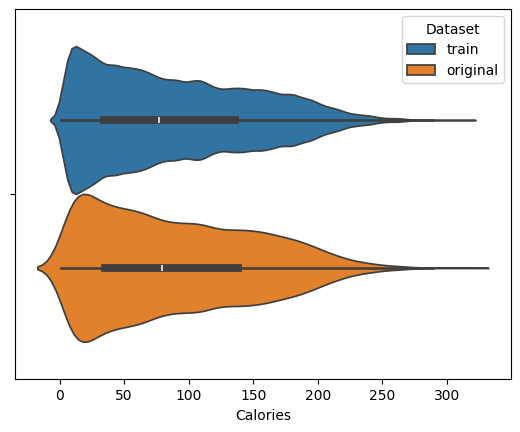

In [119]:
sns.violinplot(to_df, x="Calories", hue="Dataset")

<Axes: xlabel='Calories', ylabel='Count'>

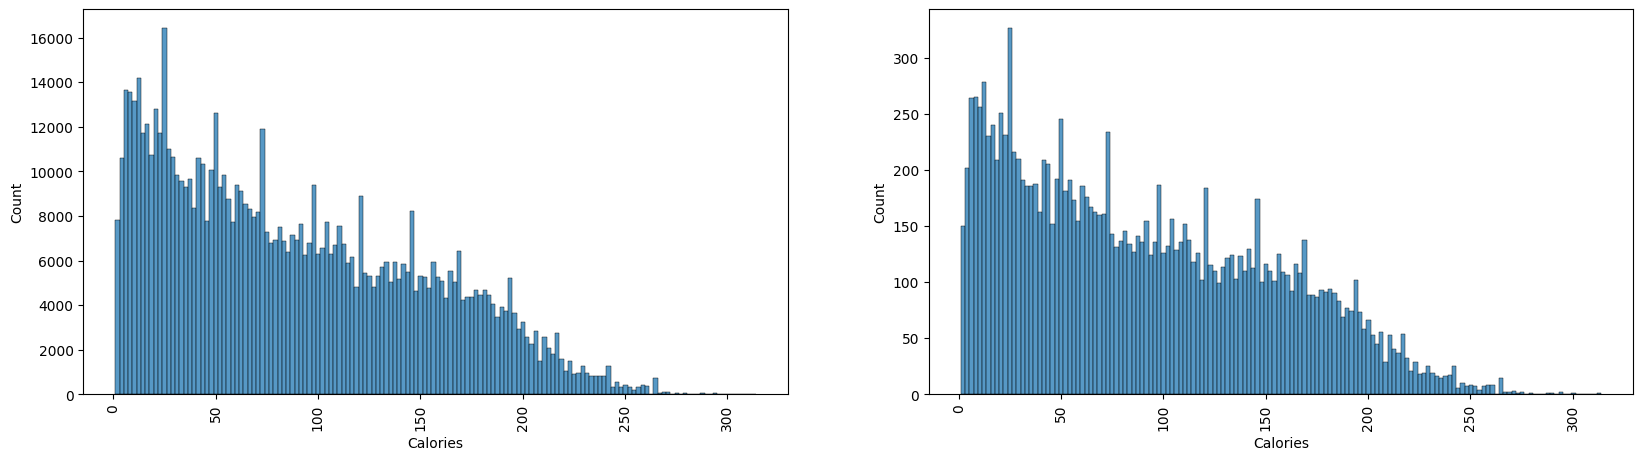

In [136]:
fig, axes = plt.subplots(1,2,figsize=(20, 5))

axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

sns.histplot(train, x="Calories",ax=axes[0], bins=150)
sns.histplot(original, x="Calories",ax=axes[1], bins=150)

Positive skew. This time however, the distributions between train and original look highly similar. There are still spikes in the distributions though. 